## Observations and Insights 

In [ ]:
# Observations:

# 1) The population is almost a perfect even split between male and female mice. 
# It would be interesting to examine the effect (if any) of sex on the drug regimens' success.

# 2) Of the four top drug regimens, the only one that appears to have an outlier is Infubinol. 
# The other three appear to behave "normally".

# 3) The Capomulin drug regimen appears to have been effective at reducing tumor volume over a 45 day period. 
# We could possibly continue treatment to see if the tumor volume is reduced further or the tumor is fully erradicated.

# 4) There is strong positive correlation (r-value of 0.84) 
# between mouse weight and average tumor volume for the Capomulin regimen, 
# meaning the larger the mouse, the larger the tumor (on average).

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [105]:
# Checking the number of mice.
total_trials = len(merge_df["Mouse ID"].unique())
total_trials

249

In [106]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_mouse

array(['g989'], dtype=object)

In [107]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_df = merge_df[merge_df["Mouse ID"] == 'g989'] 
dupe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(dupe_mouse) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [109]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
grouped_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": grouped_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": grouped_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": grouped_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": grouped_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": grouped_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_data.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem']).round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

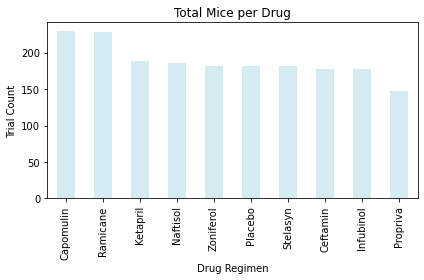

In [112]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_counts = clean_df["Drug Regimen"].value_counts()
x_axis = drug_counts.index
y_axis = drug_counts.values

count_chart = drug_counts.plot(kind = "bar", color = "lightblue", alpha = 0.5)

# Set x and y labels / Formatting
plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Total Mice per Drug")
plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

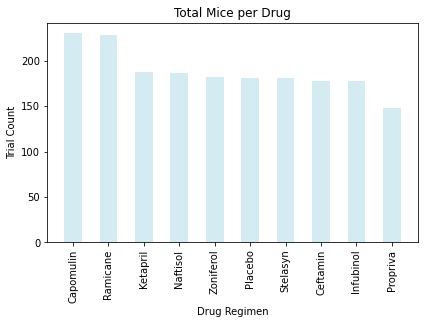

In [113]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_counts = clean_df["Drug Regimen"].value_counts()
y_axis = drug_counts.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_counts.index

plt.bar(x_drugs, y_axis, color = "lightblue", alpha = 0.5, width = 0.5, align = "center")

# Set x and y labels / Formatting
plt.ylabel("Trial Count")
plt.xlabel("Drug Regimen")
plt.title("Total Mice per Drug")
plt.tight_layout()
plt.xticks(rotation=90)

plt.show

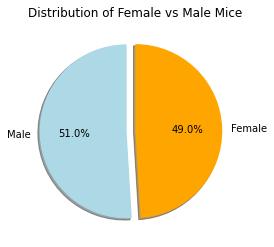

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_df["Sex"].value_counts()

# Labels for each section
labels = mf_count.values

# Values of each section 
sizes = mf_count.values

# Make into a pie chart
mf_count.plot(kind = "pie", autopct="%1.1f%%", colors = ["lightblue", "orange"], explode = [0.1, 0], shadow = True, startangle = 90)

# Formatting
plt.title("Distribution of Female vs Male Mice")
plt.ylabel(" ")
plt.show()

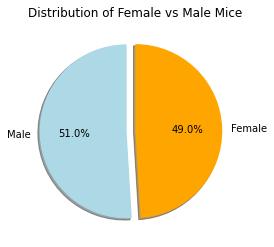

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = clean_df["Sex"].value_counts()

# Labels for each section
labels = mf_count.index

# Values of each section 
sizes = mf_count.values

# Using Pandas to print
plt.pie(sizes, labels = labels, autopct="%1.1f%%", colors = ["lightblue", "orange"], explode = [0.1, 0], shadow = True, startangle = 90)

# Formatting
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = pd.DataFrame(clean_df.groupby(["Mouse ID"])["Timepoint"].max(), columns=["Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume_df = grouped_df.merge(clean_df, left_on = [grouped_df.index,"Timepoint"], right_on = ["Mouse ID", "Timepoint"], how = "inner")

In [117]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volume = volume_df[volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(drug_volume.values)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = drug_volume[(drug_volume < lower_bound) | (drug_volume > upper_bound)]
    print(f'List of possible outliers for {drug} (if any): {outliers.values}')

List of possible outliers for Capomulin (if any): []
List of possible outliers for Ramicane (if any): []
List of possible outliers for Infubinol (if any): [36.3213458]
List of possible outliers for Ceftamin (if any): []


{'whiskers': [<matplotlib.lines.Line2D at 0x7f82e25ea160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82e25ea820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82e25dddc0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f82e25eaee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f82e25f3220>,
 'means': []}

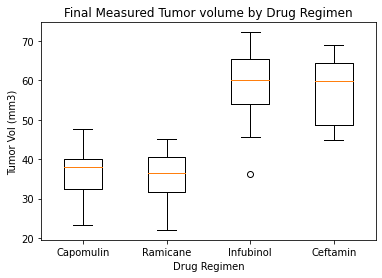

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Final Measured Tumor volume by Drug Regimen")
plt.boxplot(tumor_vol, labels = drug_list)

## Line and Scatter Plots

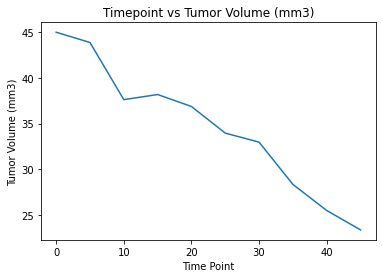

In [119]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_trials = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_mouse = clean_df.loc[clean_df["Mouse ID"] == 's185']

plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

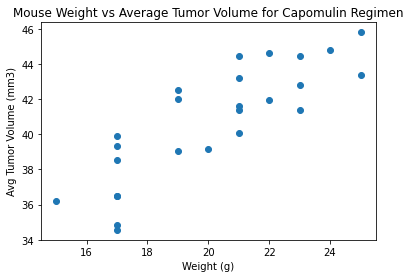

In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight = cap_trials.groupby(cap_trials["Mouse ID"])["Weight (g)"].mean()
avg_tumor = cap_trials.groupby(cap_trials["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.show()

## Correlation and Regression

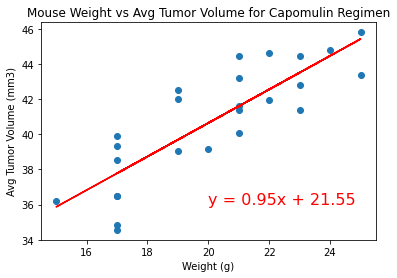

In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, color = "red")
plt.annotate(line_eq,(20,36), color = "red", fontsize = 16)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg Tumor Volume for Capomulin Regimen")
plt.show()

In [122]:
corr = round(st.pearsonr(weight, avg_tumor)[0],2)
print(f'The correlation between mouse weight and avergae tumor volume is {corr}')

The correlation between mouse weight and avergae tumor volume is 0.84
